In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# showing all columns
pd.set_option('display.max_columns', None)

In [4]:
sns.set_style('white')
plt.rc("axes.spines", top=False, right=False) #  turn off the visibility of the top and right spines for all the graphs

In [5]:
# loading the dataset to a pandas DataFrame object
car_df = pd.read_csv('Task_data.csv')

## Exploratory Data Analysis

In [6]:
car_df.head(5)

,registrationNumber,fuelType,monthOfFirstRegistration
0,ORZ1598,Diesel,2020-03-01 00:00:00 UTC
1,ORZ6755,Diesel,2020-03-01 00:00:00 UTC
2,RGZ3683,Diesel,2020-03-01 00:00:00 UTC
3,UIG7890,Diesel,2020-03-01 00:00:00 UTC
4,UIG8424,Diesel,2020-03-01 00:00:00 UTC


In [7]:
# renaming the column names for more convenient names
car_df.rename({'registrationNumber':'VRN',
              'monthOfFirstRegistration':'first_reg_date'}, 
              axis=1,
             inplace=True)

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48605 entries, 0 to 48604
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   VRN             48605 non-null  object
 1   fuelType        48605 non-null  object
 2   first_reg_date  48605 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


We notice that the **first_reg_date** is not a datetime object, we should fix it later

In [9]:
car_df.fuelType.unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Pure electric', 'Gas'], dtype=object)

This sample data set, consists of **48,605** rows and **3** columns. Its information is about about vehicles registered in Northern Ireland from March 2020 to March 2021.<br>more analytically:

1. **VRN**: Refers to the Vehicle Registration Number of the vehicle. From it we can derive information about where the vehicle was registered.
2. **fuelType**: Refers to the vehicle's fuel type (Petrol, Diesel, Hybrid, Pure electric, Gas).
3. **first_reg_date**: Refers to the date the vehicle was first registered .

#### Missing values

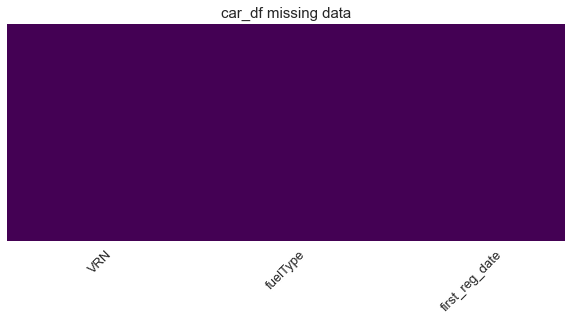

In [10]:
# the below heatmap depicts any missing value with yellow color
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(car_df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax1)
ax1.tick_params(axis='x', labelsize=13, rotation = 45)
ax1.set_title('car_df missing data', fontsize=15);

In [12]:
car_df.isnull().sum()

VRN               0
fuelType          0
first_reg_date    0
dtype: int64

**There are no missing values in the dataset**

#### Duplicated values

In [11]:
car_df.duplicated(keep=False).sum() 
# the dataframe.duplicated() method returns a boolean series denoting the duplicate rows
# the keep argument determines which duplicates to mark, keep=False marks all duplicate rows as TRUE, whule keep='first' mark duplicates as True except for the first occurrence
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

0

**All rows are unique**

### Registration Number feature

In [12]:
car_df.VRN.duplicated(keep=False).sum() 

0

**All the cars are unique**

According to the wiki page, the 2nd and 3rd letter of the VRN in N.Ireland indicate the area where the vehicle was registered.<br>
We are going to extract those letters

In [18]:
car_df['country_code'] = car_df.VRN.apply(lambda x: x[1:3]) # a simple lambda function to extract the letters within the string's 1:3 index range

In [19]:
car_df['country_code'].value_counts().index.sort_values() # i simple returned the country codes in alphabetical order in order to copy and paste them in the dict below

Index(['AZ', 'BZ', 'CZ', 'DZ', 'EZ', 'FZ', 'GZ', 'HZ', 'IA', 'IB', 'IG', 'IJ',
       'IL', 'IW', 'JI', 'JZ', 'KZ', 'LZ', 'NZ', 'OI', 'RZ', 'SZ', 'UI', 'XI',
       'XZ', 'YZ'],
      dtype='object')

In [20]:
# i construct a dictionary in order to replace the country codes to their corresponding country names using the pandas replace() method
country_code_dict = {'AZ':'Belfast', 
                     'BZ':'Down', 
                     'CZ':'Belfast', 
                     'DZ':'Antrim', 
                     'EZ':'Belfast', 
                     'FZ':'Belfast', 
                     'GZ':'Belfast', 
                     'HZ':'Tyrone', 
                     'IA':'Antrim', 
                     'IB':'Armagh',
                     'IG':'Fermanagh', 
                     'IJ':'Down', 
                     'IL':'Fermanagh', 
                     'IW':'County Londonderry', 
                     'JI':'Tyrone', 
                     'JZ':'Down', 
                     'KZ':'Antrim', 
                     'LZ':'Armagh', 
                     'NZ':'County Londonderry', 
                     'OI':'Belfast',
                     'RZ':'Antrim', 
                     'SZ':'Down', 
                     'UI':'City of Londonderry', 
                     'XI':'Belfast', 
                     'XZ':'Armagh', 
                     'YZ':'County Londonderry'}

In [21]:
car_df['country_code'] = car_df['country_code'].replace(country_code_dict)

In [22]:
# switcing this column to a category type from object type for better memory optimization (its a smalll data set but is a good practice)
car_df['country_code'] = car_df['country_code'].astype('category')

<ipython-input-66-180558936fe5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])


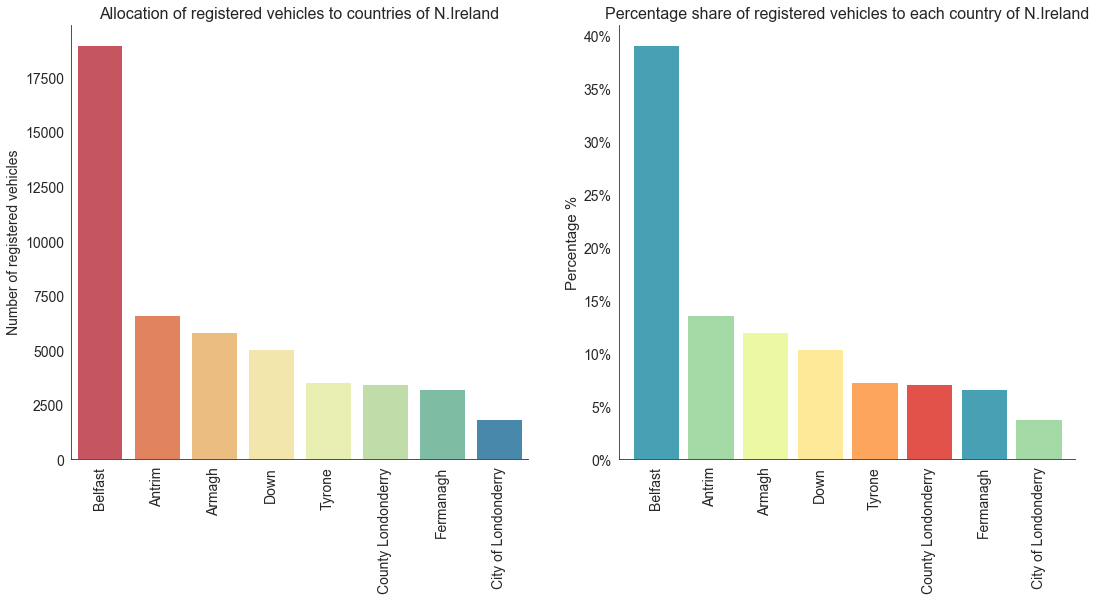

In [66]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
ax1 = sns.countplot(x = 'country_code', 
                    data = car_df, 
                    order = car_df.country_code.value_counts().index, # ordering the bars based on their count (most common type is ordered first)
                    palette='Spectral',
                    ax = axes[0])

ax1.set_title('Allocation of registered vehicles to countries of N.Ireland', fontsize=16)
ax1.tick_params(labelsize=14)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel(None)
ax1.set_ylabel('Number of registered vehicles', fontsize=14)
#####
ax2 = (car_df.country_code.value_counts() / len(car_df)).plot(kind='bar', 
                                                          width = 0.85,
                                                          color = sns.color_palette(palette='Spectral_r'),
                                                          ax=axes[1])
ax2.set_title('Percentage share of registered vehicles to each country of N.Ireland', fontsize=16)
ax2.set_ylabel('Percentage %', fontsize=15)
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.tick_params(labelsize=14);

We can notice that the vast majority of the vehicles of our data set (almost 40%) are registered in Belfast, while none of the other countries compine more than 15% of the sample data.

### Fuel type feature

In [70]:
car_df.fuelType.value_counts()

Petrol           23683
Diesel           16833
Hybrid            6098
Pure electric     1937
Gas                 54
Name: fuelType, dtype: int64

In [71]:
# switching the fuel column type to a category type for better memory optimization
car_df.fuelType = car_df.fuelType.astype('category')

<ipython-input-75-48da81a767d1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])


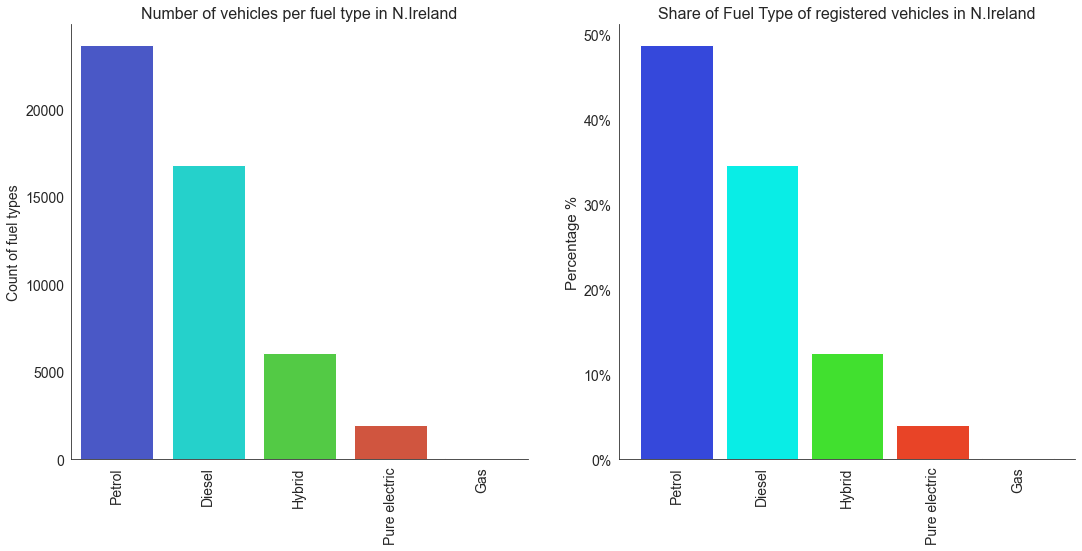

In [75]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
ax1 = sns.countplot(x = 'fuelType', 
                    data = car_df, 
                    order = car_df.fuelType.value_counts().index,
                    palette = ['#3548db','#09ede6','#41e02f','#e84427','#b22ac9'],
                    ax = axes[0])
ax1.set_title('Number of vehicles per fuel type in N.Ireland', fontsize=16)
ax1.tick_params(labelsize=14)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel(None)
ax1.set_ylabel('Count of fuel types', fontsize=14)
#####
ax2 = (car_df.fuelType.value_counts() / len(car_df)).plot(kind='bar', 
                                                          width = 0.85,
                                                          color=['#3548db','#09ede6','#41e02f','#e84427','#b22ac9'],
                                                          ax=axes[1])
ax2.set_title('Share of fuel type of registered vehicles in N.Ireland', fontsize=16)
ax2.set_ylabel('Percentage %', fontsize=15)
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.tick_params(labelsize=14);

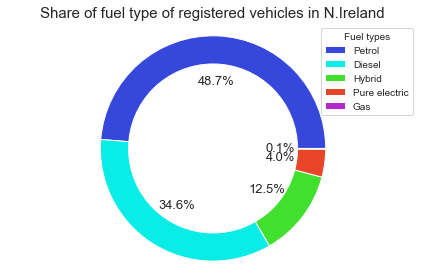

In [81]:
# credits to Kevin Amipara https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(car_df.fuelType.value_counts(),
                                    autopct='%.1f%%', 
                                    labels = None,
                                    colors=['#3548db','#09ede6','#41e02f','#e84427','#b22ac9'],
                                    textprops={'fontsize': 13},
                                   normalize=True
                                   )
ax1.set_title('Share of fuel type of registered vehicles in N.Ireland', fontsize=15)
ax1.legend(title='Fuel types', labels=['Petrol','Diesel','Hybrid','Pure electric','Gas'], )
# just drawing a white circle in the center to create the "donut effect"
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

In [83]:
# i am making a pivot table with rows as country code and columns as fuel type in order to depict the number/percentage of each fuel type to every country
fuel_country_pivot = pd.pivot_table(car_df, index='country_code', columns='fuelType', aggfunc='count')['VRN'] 
fuel_country_pivot

fuelType,Diesel,Gas,Hybrid,Petrol,Pure electric
country_code,,,,,
Antrim,2116,3,815,3474,211
Armagh,2164,25,748,2722,175
Belfast,5891,7,2296,9785,1009
City of Londonderry,750,0,220,859,39
County Londonderry,1310,0,432,1625,99
Down,1641,7,690,2550,154
Fermanagh,1328,4,462,1287,145
Tyrone,1633,8,435,1381,105


In [84]:
fuel_country_pivot_perc = fuel_country_pivot.apply(lambda x: (x/fuel_country_pivot.sum(axis=1)*100), axis=0)
# fuel_country_pivot.sum(axis=1) with this function we divide each row with the sum  of the respective row in order to return the share of fuel type per country

In [108]:
fuel_country_pivot_perc

fuelType,Diesel,Gas,Hybrid,Petrol,Pure electric
country_code,,,,,
Antrim,31.968575,0.045324,12.313038,52.485270,3.187793
Armagh,37.092904,0.428522,12.821392,46.657525,2.999657
Belfast,31.024858,0.036865,12.091847,51.532547,5.313882
City of Londonderry,40.149893,0.000000,11.777302,45.985011,2.087794
County Londonderry,37.795730,0.000000,12.463935,46.884016,2.856319
Down,32.546608,0.138834,13.685046,50.575169,3.054344
Fermanagh,41.165530,0.123993,14.321141,39.894606,4.494730
Tyrone,45.845031,0.224593,12.212240,38.770354,2.947782


In [86]:
from matplotlib.ticker import StrMethodFormatter

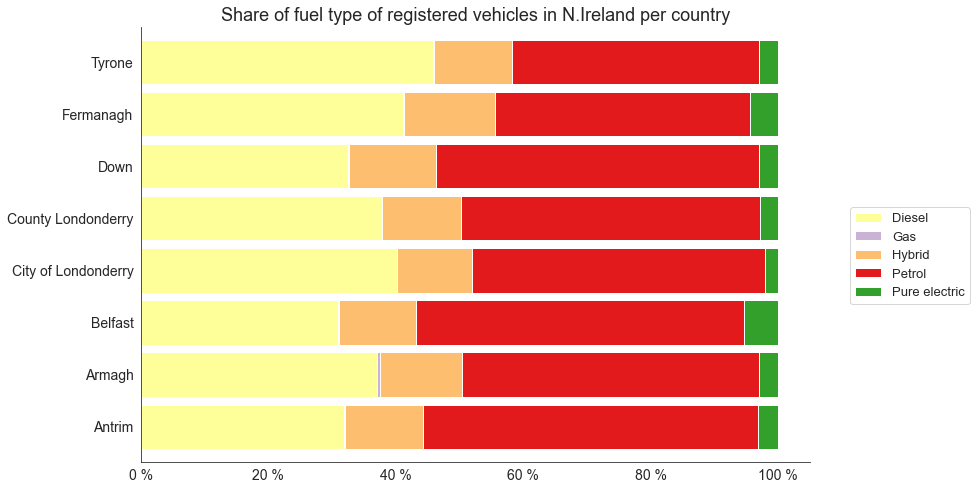

In [107]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
fuel_country_pivot_perc.plot(kind='barh', 
                             stacked=True,
                             color = sns.color_palette(palette='Paired_r'),
                             width = 0.85,
                             ax=ax1)
ax1.set_title('Share of fuel type of registered vehicles in N.Ireland per country', fontsize=18)
ax1.xaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f} %"))
ax1.tick_params(labelsize=14)
ax1.set_ylabel(None)
ax1.legend(bbox_to_anchor = (1.05, 0.6), fontsize=13);

From the above graphs the following can be noticed:

1. The majority of the vehicles use Petrol, while there those using gas are insignificnant.
2. Belfast is the country with the highest propotion of pure electric vehicles, followed by Fermanagh.
3. The City of Londonderry have the least pure electric cars.
4. Tyrone and Fermanagh are the only countries where diesel vehicles are more than the petrol ones.
5. Hybrid cars have a significant share (almost stable) in all the countries (about 12%).

### Date of registration Number

In [110]:
car_df['date'] = car_df.first_reg_date.apply(lambda x: x[:10])

In [111]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48605 entries, 0 to 48604
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   VRN             48605 non-null  object  
 1   fuelType        48605 non-null  category
 2   first_reg_date  48605 non-null  object  
 3   country_code    48605 non-null  category
 4   date            48605 non-null  object  
dtypes: category(2), object(3)
memory usage: 1.2+ MB


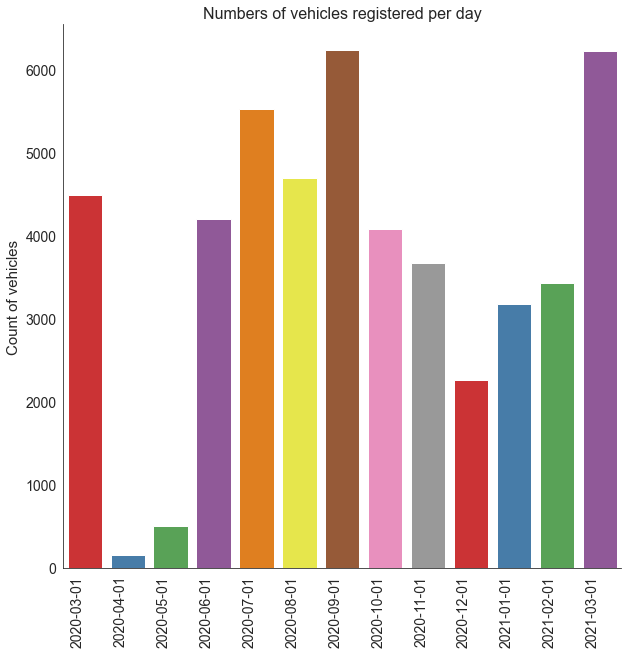

In [125]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='date', data=car_df, palette='Set1')
plt.title('Numbers of vehicles registered per day', fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=14)
plt.xlabel(None)
plt.yticks(fontsize=14)
plt.ylabel('Count of vehicles', fontsize=15);

## Question

***How many vehicles of each fuel type were registered in each region of Northern Ireland per month?***

To achieve this, a pivot table can be created with a MultiIndex, with first level index the fueltype and second the date (month) and columns the contry code.

In [126]:
pd.set_option('display.max_rows', 85)

In [127]:
car_pivot_1 = pd.pivot_table(car_df, index=['fuelType','date'], columns='country_code', aggfunc='count')['VRN']
car_pivot_1

country_code              Antrim  Armagh  Belfast  City of Londonderry  \
fuelType      date                                                       
Diesel        2020-03-01     274     194      584                   70   
              2020-04-01      25      20       18                    3   
              2020-05-01      26      45       60                   14   
              2020-06-01     178     195      513                   57   
              2020-07-01     222     217      654                   78   
              2020-08-01     181     220      696                   55   
              2020-09-01     252     267      718                   75   
              2020-10-01     161     179      536                   56   
              2020-11-01     135     149      394                  100   
              2020-12-01      61      54      233                   39   
              2021-01-01     147     152      392                   58   
              2021-02-01     170     169      401                   60   
              2021-03-01     284     303      692                   85   
Gas           2020-03-01       1       0        0                    0   
              2020-04-01       0       0        0                    0   
              2020-05-01       0       0        0                    0   
              2020-06-01       0       1        0                    0   
              2020-07-01       0       0        0                    0   
              2020-08-01       0       2        3                    0   
              2020-09-01       1       6        1                    0   
              2020-10-01       0       3        1                    0   
              2020-11-01       1       4        0                    0   
              2020-12-01       0       1        0                    0   
              2021-01-01       0       3        2                    0   
              2021-02-01       0       1        0                    0   
              2021-03-01       0       4        0                    0   
Hybrid        2020-03-01      47      55      163                   15   
              2020-04-01       0       0        0                    0   
              2020-05-01       0       1        9                    0   
              2020-06-01      46      38      166                    9   
              2020-07-01      83      86      212                   23   
              2020-08-01      73      67      167                   20   
              2020-09-01      95      97      279                   33   
              2020-10-01      74      87      206                   19   
              2020-11-01      76      61      224                   24   
              2020-12-01      38      41      109                    8   
              2021-01-01      65      53      203                   17   
              2021-02-01      71      63      187                   12   
              2021-03-01     147      99      371                   40   
Petrol        2020-03-01     329     262      797                   72   
              2020-04-01      11       3       11                    1   
              2020-05-01      32      34       90                    8   
              2020-06-01     343     247      852                   65   
              2020-07-01     434     366     1211                  113   
              2020-08-01     346     257      945                   84   
              2020-09-01     455     350     1316                  110   
              2020-10-01     271     237      845                   70   
              2020-11-01     236     200      793                   81   
              2020-12-01     192     109      484                   32   
              2021-01-01     162     156      611                   46   
              2021-02-01     271     192      704                   76   
              2021-03-01     392     309     1126                  101   
Pure

***How many vehicles of each fuel type have been registered in each month in Northern Ireland?***

For this a pivot table can be created with rows the fuel type, and columns the date (months).

In [128]:
car_pivot_2 = pd.pivot_table(car_df, index='fuelType', columns='date', fill_value=0, aggfunc='count')['VRN']
car_pivot_2

date,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01
fuelType,,,,,,,,,,,,,
Diesel,1776,107,225,1501,1801,1741,2001,1359,1156,591,1175,1227,2173
Gas,1,0,0,3,0,6,14,4,5,2,7,3,9
Hybrid,411,0,14,404,641,483,753,596,543,279,525,468,981
Petrol,2178,33,216,2168,2933,2317,3192,1984,1819,1139,1323,1623,2758
Pure electric,119,11,50,120,147,141,268,137,147,247,141,112,297


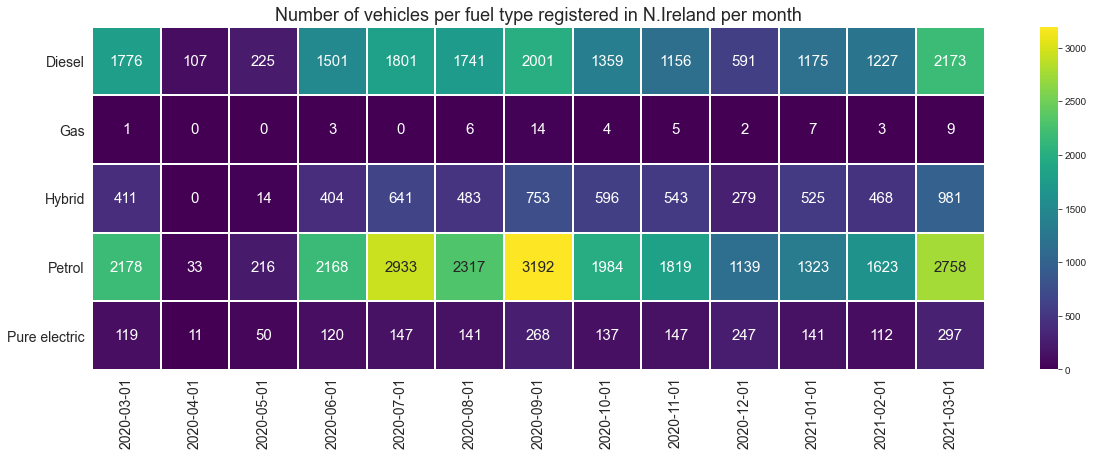

In [183]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(car_pivot_2, 
            cmap='viridis', 
            ax = ax1, 
            annot=True, # write the value of each cell
            fmt='d', # use integer formatting
            annot_kws={'fontsize':15}, # setting fontize of the text within the cells
            linewidths=0.1, # add a line with width=0.1 to devide the cells
            square=True, # square-shaped cells
            cbar_kws={"shrink": .63} # Fraction by which to multiply the size of the colorbar
           )
ax1.tick_params(axis='x', labelsize=14, rotation=90)
ax1.tick_params(axis='y', labelsize=14, rotation=0)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_title('Number of vehicles per fuel type registered in N.Ireland per month', fontsize=18);